<img src="http://akhavanpour.ir/notebook/images/srttu.gif" alt="SRTTU" style="width: 150px;"/>

[![Azure Notebooks](https://notebooks.azure.com/launch.png)](https://notebooks.azure.com/import/gh/Alireza-Akhavan/class.vision)

In [1]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


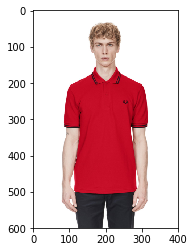

In [4]:
image_path = './images/example_mlc_01.jpg'
# load the image
image = cv2.imread(image_path)
output = imutils.resize(image, width=400)
plt.imshow(output[:,:,-1::-1])

In [5]:
# pre-process the image for classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [6]:
model_path = './ml_fashion.h5'
label_path = './ml_fashion.pickle'

In [7]:
# load the trained convolutional neural network and the multi-label
# binarizer
model = load_model(model_path)
mlb = pickle.loads(open(label_path, "rb").read())

In [8]:
mlb

MultiLabelBinarizer(classes=None, sparse_output=False)

black: 0.06%
blue: 0.04%
jeans: 0.04%
red: 100.00%
shirt: 99.97%


13

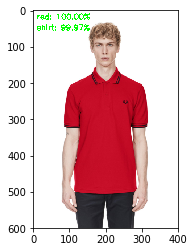

In [9]:
# classify the input image then find the indexes of the two class
# labels with the *largest* probability
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:2]

# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
    # build the label and draw the label on the image
    label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
    cv2.putText(output, label, (10, (i * 30) + 25), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
    print("{}: {:.2f}%".format(label, p * 100))

# show the output image
plt.imshow(output[...,-1::-1])
cv2.imshow("Output", output)
cv2.waitKey(0)

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دانشگاه تربیت دبیر شهید رجایی<br>مباحث ویژه 2 - یادگیری عمیق پیشرفته<br>علیرضا اخوان پور<br>97-98<br>
</div>
<a href="https://www.srttu.edu/">SRTTU.edu</a> - <a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a>
</div>